### Analysis and Plotting of Differential Scanning Calorimetry (DSC), Thermogravimetric Analaysis (TGA), and Differential Thermal Analysis (DTA) Plots of Commercial Polyurethane Foam

### Part 1 - DSC Plots

* * *
*Code written by Francis Sanguyo*

*Start Date: February 1, 2026*

*End Date: February 7, 2026*

*Description:*

This program plots and analyzes instrument data from Shimadzu DSC-60 Series and Shimadzu DTG-60A Series regarding the thermal properties of commercial polyurethane (PU) foam samples. These plots include DSC, TGA, and DTA, respectively.

* * *
### Script Outline
1. Preliminaries: import packages, assign data file links, and sample names
2. Create dataframes for each DSC file for each PU sample
3. Plot trends between temperature versus DSC signal
4. Plot trends between time versus DSC signal
4. Automatically detect peaks in DSC signal, and manually assign regions (range) per peak
5. Plot trends between temperature versus DSC signal with necessary labels and peaks
6. Plot trends between time versus DSC signal with necessary labels and peaks
7. Estimate enthalpy values (in kJ/g) of each phase transition

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.signal import find_peaks, savgol_filter
from scipy.integrate import simpson

In [3]:
ROOT_DIR = os.getcwd()
path_DSC_PUSample1 = ROOT_DIR + "/DSC Data Files" + "/DSC_PU_Sample1.txt"
path_DSC_PUSample2 = ROOT_DIR + "/DSC Data Files" + "/DSC_PU_Sample2.txt"
path_DSC_PUSample3 = ROOT_DIR + "/DSC Data Files" + "/DSC_PU_Sample3.txt"
path_TGA_DTA_PUSample1 = ROOT_DIR + "/TGA & DTA Data Files" + "/TGA&DTA_PUSample1.txt"
path_TGA_DTA_PUSample2 = ROOT_DIR + "/TGA & DTA Data Files" + "/TGA&DTA_PUSample2.txt"

print(f"Obtained Root Directory: \n {ROOT_DIR}")

Obtained Root Directory: 
 /Users/francismiguelj.sanguyo/Documents/Personal School Documents/Year 4 Senior (ADMU)/Year 4 Sem 2 (Jan-Apr 2025)/MATSE 121.02 LAB (LAB2-VX) - Polymers, Polymeric Materials, Laboratory/Analysis and Plotting of DSC, TGA, and DTA


In [4]:
DF_DSC_PUSample1 = pd.read_csv(path_DSC_PUSample1, sep="\\s+")
DF_DSC_PUSample2 = pd.read_csv(path_DSC_PUSample2, sep="\\s+")
DF_DSC_PUSample3 = pd.read_csv(path_DSC_PUSample3, sep="\\s+")
## Note that \\s+ is a regular expression used for detecting one or more white spaces

# Check data frames for Sample 1 to check that they have been converted correctly
print(DF_DSC_PUSample1)
print(DF_DSC_PUSample2)
print(DF_DSC_PUSample3)

# Compile data frames into a single list
DFList_DSC_PUSamples_Uncleaned = [DF_DSC_PUSample1, DF_DSC_PUSample2, DF_DSC_PUSample3]

         Time(sec)     Temp(C)   DSC(mW)
0         0.000000   30.456699 -0.268830
1         0.100098   30.455000 -0.268669
2         0.199951   30.455599 -0.268482
3         0.300049   30.455898 -0.268305
4         0.400146   30.453899 -0.268182
...            ...         ...       ...
11558  1155.800049  221.929794 -0.431602
11559  1155.900146  221.945892 -0.431586
11560  1156.000000  221.962387 -0.431543
11561  1156.100098  221.979996 -0.431548
11562  1156.199951  221.993195 -0.431506

[11563 rows x 3 columns]
         Time(sec)    Temp(C)   DSC(mW)
0         0.000000  30.344700 -0.137585
1         0.099854  30.343500 -0.137510
2         0.199951  30.340500 -0.137499
3         0.299805  30.338900 -0.137520
4         0.399902  30.338299 -0.137510
...            ...        ...       ...
35917  3591.699707  30.004599 -0.333660
35918  3591.799805  30.003199 -0.333692
35919  3591.899902  30.002699 -0.333682
35920  3592.000000  30.001499 -0.333671
35921  3592.100098  30.000399 -0.333639

[

In [5]:
# Clean the data frames by excluding irrelevant data for the plots
DFList_DSC_PUSamples_Cleaned = []
for DF_DSC in DFList_DSC_PUSamples_Uncleaned: # Get only rows with increasing temperature:
    DFBool_is_increasing = DF_DSC['Temp(C)'].diff() > 0
    DF_DSCNew = DF_DSC[DFBool_is_increasing | DFBool_is_increasing.shift(-1, fill_value=False)]

    # Get the part of the data frame that is at least 40 deg C and at most 220 deg C
    DF_DSCNew = DF_DSCNew[DF_DSCNew["Temp(C)"] >= 40]
    DF_DSCNew = DF_DSCNew[DF_DSCNew["Temp(C)"] <= 220]

    # Add to the cleaned data frames
    DFList_DSC_PUSamples_Cleaned.append(DF_DSCNew)

for index in range(len(DFList_DSC_PUSamples_Cleaned)):
    print(DFList_DSC_PUSamples_Cleaned[index])

         Time(sec)     Temp(C)   DSC(mW)
694      69.400146   40.006298 -0.600971
695      69.500000   40.023701 -0.600832
696      69.600098   40.041298 -0.600666
697      69.699951   40.058598 -0.600489
698      69.800049   40.075897 -0.600339
...            ...         ...       ...
11440  1144.000000  219.931702 -0.432228
11441  1144.100098  219.947891 -0.432335
11442  1144.199951  219.964600 -0.432367
11443  1144.300049  219.977798 -0.432453
11444  1144.400146  219.992798 -0.432479

[10751 rows x 3 columns]
         Time(sec)     Temp(C)   DSC(mW)
702      70.199951   40.008198 -0.256814
703      70.299805   40.026798 -0.256573
704      70.399902   40.043900 -0.256327
705      70.500000   40.061199 -0.256097
706      70.599854   40.078197 -0.255819
...            ...         ...       ...
11454  1145.399902  219.944092 -0.756766
11455  1145.500000  219.956589 -0.755456
11456  1145.599854  219.968597 -0.753990
11457  1145.699951  219.980591 -0.752412
11458  1145.799805  219.991898 

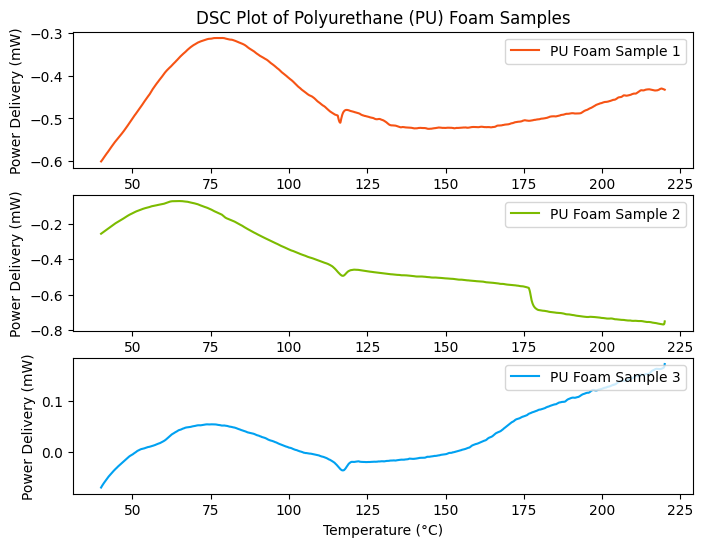

In [6]:
# Plot Temperature versus DSC Signal
figure, axis = plt.subplots(3, 1, figsize=(8, 6))

# Set colors for the DSC signal
colors = ["#f65314", "#7cbb00", "#00a1f1"]

index = 0
for DF_DSC in DFList_DSC_PUSamples_Cleaned:
    # Get data values for X and Y axes
    X_Temperature = DF_DSC["Temp(C)"]
    Y_DSCSignal = DF_DSC["DSC(mW)"]

    # Plot X and Y Axes
    axis[index].plot(X_Temperature, Y_DSCSignal, label = f"PU Foam Sample {index+1}",
                     color = colors[index])
    axis[index].set(ylabel="Power Delivery (mW)")
    axis[index].legend(loc="upper right")

    if index == 0:
        axis[index].set_title("DSC Plot of Polyurethane (PU) Foam Samples")
    if index == len(DFList_DSC_PUSamples_Cleaned) -1:
        axis[index].set(xlabel="Temperature (°C)")

    # Make the legend appear

    index += 1

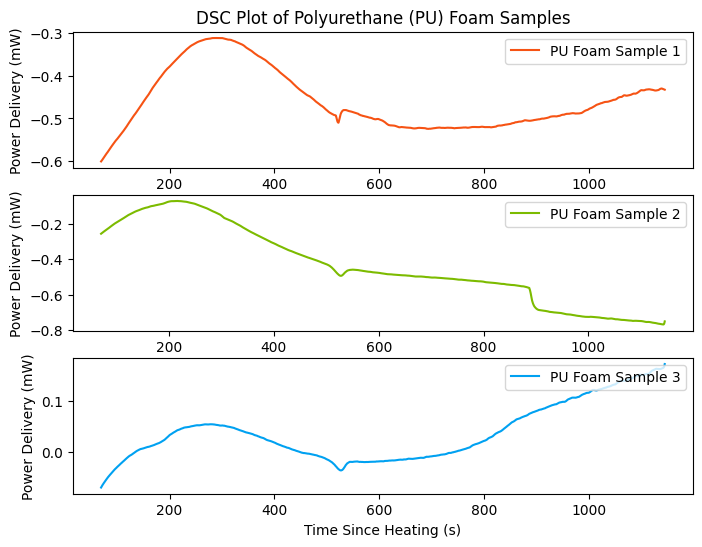

In [7]:
# Plot Time versus DSC Signal
figure, axis = plt.subplots(3, 1, figsize=(8, 6))

# Set colors for the DSC signal
colors = ["#f65314", "#7cbb00", "#00a1f1"]

index = 0
for DF_DSC in DFList_DSC_PUSamples_Cleaned:
    # Get data values for X and Y axes
    X_Time = DF_DSC["Time(sec)"]
    Y_DSCSignal = DF_DSC["DSC(mW)"]

    # Plot X and Y Axes
    axis[index].plot(X_Time, Y_DSCSignal,  label = f"PU Foam Sample {index+1}",
                     color = colors[index])
    axis[index].set(ylabel="Power Delivery (mW)")
    axis[index].legend(loc="upper right")

    if index == 0:
        axis[index].set_title("DSC Plot of Polyurethane (PU) Foam Samples")
    if index == len(DFList_DSC_PUSamples_Cleaned) -1:
        axis[index].set(xlabel="Time Since Heating (s)")
    index += 1

In [8]:
# Get the local minima of the DSC plots relative to temperature, then get average and stdev

# Create lists for compiling peak time, temperature, and power output
list_DSCPeaks_times = []
list_DSCPeaks_temp = []
list_DSCPeaks_power = []
list_DSCPeaks_sampleNumber = []

# Set parameters for finding DSC minima
param_peakDistance = 20
param_prominence = 0.03  # Value obtained by trial-and-error

index = 0
for DF_DSC in DFList_DSC_PUSamples_Cleaned:
    # Find minima
    DSCPeaks_indices, misc_peakOutput = find_peaks(-DF_DSC["DSC(mW)"],
                                                   distance=param_peakDistance,
                                                   height=(None, None),
                                                   prominence=param_prominence)

    # Get the corresponding temperatures, DSC power outputs, and time elapsed
    DSCPeaks_times = list(np.take(np.array(DF_DSC["Time(sec)"]), DSCPeaks_indices))
    DSCPeaks_temps= list(np.take(np.array(DF_DSC["Temp(C)"]), DSCPeaks_indices))
    DSCPeaks_power = list(np.take(np.array(DF_DSC["DSC(mW)"]), DSCPeaks_indices))
    DSCPeaks_sampleNumber = index + 1

    # Get the number of peaks
    DSCPeaks_count = len(DSCPeaks_indices)

    # Append entries to the corresponding lists
    list_DSCPeaks_times.extend(DSCPeaks_times)
    list_DSCPeaks_temp.extend(DSCPeaks_temps)
    list_DSCPeaks_power.extend(DSCPeaks_power)
    for i in range(DSCPeaks_count):
        list_DSCPeaks_sampleNumber.append(DSCPeaks_sampleNumber)

    index += 1
# Create a data frame to represent all the peaks found
DF_DSCPeaks = pd.DataFrame({
    "Sample Number": list_DSCPeaks_sampleNumber,
    "Time (s)": list_DSCPeaks_times,
    "Temperature (°C)": list_DSCPeaks_temp,
    "Power Delivery (mW)": list_DSCPeaks_power
})
print(DF_DSCPeaks)


   Sample Number    Time (s)  Temperature (°C)  Power Delivery (mW)
0              1  522.000000        116.374496            -0.510118
1              1  694.100098        144.813904            -0.524547
2              2  527.899902        117.211998            -0.494020
3              3  527.000000        117.216599            -0.037311


In [9]:
# Report only the peaks corresponding to 116 deg C as this appears to be the most prominent peak
list_reportDSCPeaks_numbers = [0, 2, 3]
list_reportDSCPeaks_times = [list_DSCPeaks_times[index] for index in list_reportDSCPeaks_numbers]
list_reportDSCPeaks_temp = [list_DSCPeaks_temp[index] for index in list_reportDSCPeaks_numbers]
list_reportDSCPeaks_power = [list_DSCPeaks_power[index] for index in list_reportDSCPeaks_numbers]
list_reportDSCPeaks_sampleNumber = [list_DSCPeaks_sampleNumber[index] for index in list_reportDSCPeaks_numbers]

# Create a data frame to represent the selected peaks found
DF_DSCPeaks = pd.DataFrame({
    "Sample Number": list_reportDSCPeaks_sampleNumber,
    "Time (s)": list_reportDSCPeaks_times,
    "Temperature (°C)": list_reportDSCPeaks_temp,
    "Power Delivery (mW)": list_reportDSCPeaks_power
})
print(DF_DSCPeaks)

# Then get the average and standard deviation of obtained temperatures of transition
DSCPeaks_temp_average = np.average(np.array([list_reportDSCPeaks_temp]))
DSCPeaks_temp_stdev = np.std(np.array([list_reportDSCPeaks_temp]))
print(f"\nReported Glass Transition Temperature for the Hard Segment of PU Foam: \n"
      f"   Tg(HS PU)= {DSCPeaks_temp_average:.1f} (± {DSCPeaks_temp_stdev:.1f}) °C")


   Sample Number    Time (s)  Temperature (°C)  Power Delivery (mW)
0              1  522.000000        116.374496            -0.510118
1              2  527.899902        117.211998            -0.494020
2              3  527.000000        117.216599            -0.037311

Reported Glass Transition Temperature for the Hard Segment of PU Foam: 
   Tg(HS PU)= 116.9 (± 0.4) °C


In [67]:
# Estimate the enthalpy values (in kJ/g) for glass transition of PU
# Only use the second and third plots since the first sample had 12.000 mg (mass outlier)
Enthalpy_timeRangeLow = 497
Enthalpy_timeRangeHigh = 543

sample_masses_mg = [0.700, 0.700]

# Set parameters for the Savitzky-Golay filter
param_savgol_windowSize = 4000
param_savgol_polyOrder = 3

index = 0
DFList_DSC_PeakArea = []
for DF_DSC in DFList_DSC_PUSamples_Cleaned[1:]:
    X_Time = DF_DSC["Time(sec)"]

    # Lower values are the actual DSC signals
    SignalLowerValues = DF_DSC["DSC(mW)"] / sample_masses_mg[index] * 100

    # Upper values are the baseline of DSC signal estimated via Savitzky-Golay filter
    # checked via plotting to "imitate" a baseline shape
    SignalUpperValues = savgol_filter(DF_DSC["DSC(mW)"] / sample_masses_mg[index] * 100, param_savgol_windowSize, param_savgol_polyOrder)

    # Take the difference to get power change in mW = mJ/s
    SignalDifference = SignalUpperValues - SignalLowerValues
    DF_DSC_PeakArea = pd.DataFrame({"Time(sec)": X_Time, "DSC(mW)":SignalDifference})
    DFList_DSC_PeakArea.append(DF_DSC_PeakArea)

index = 0
Enthalpy_peakArea = []
Enthalpy_values = []
for DF_DSC_PA in DFList_DSC_PeakArea:
    DF_DSC_PA = DF_DSC_PA[DF_DSC_PA["Time(sec)"] >= Enthalpy_timeRangeLow]
    DF_DSC_PA = DF_DSC_PA[DF_DSC_PA["Time(sec)"] <= Enthalpy_timeRangeHigh]

    # Compute peak area in mJ = mW x s via Simpson's rule
    PeakArea = simpson(DF_DSC_PA["DSC(mW)"], DF_DSC_PA["Time(sec)"])

    # Compute enthalpy value of glass transition in J/g
    EnthalpyValue = PeakArea / sample_masses_mg[index]

    Enthalpy_values.append(EnthalpyValue)
    Enthalpy_peakArea.append(PeakArea)
    index += 1

# Create a data frame to present enthalpy value results
DF_DSCEnthalpy = pd.DataFrame({
    "Sample Number": [2, 3],
    "Time Range (s)": f"{Enthalpy_timeRangeLow} - {Enthalpy_timeRangeHigh}",
    "Peak Area (mJ)": Enthalpy_peakArea,
    "Enthalpy (J/g)": Enthalpy_values
})

# Get average and standard deviation of peak area and enthalpy
Enthalpy_peakArea_average = np.average(Enthalpy_peakArea)
Enthalpy_peakArea_stdev = np.std(Enthalpy_peakArea)
Enthalpy_value_average = np.average(Enthalpy_values)
Enthalpy_value_stdev = np.std(Enthalpy_values)

print(DF_DSCEnthalpy)

print(f"\nReported DSC peak area for glass transition of PU foam: \n"
      f"   Peak Area = {Enthalpy_peakArea_average:.1f} (± {Enthalpy_peakArea_stdev:.1f}) mJ\n\n"
      f"Reported enthalpy of glass transition for PU foam: \n"
      f"   Enthalpy = {Enthalpy_value_average:.1f} (± {Enthalpy_value_stdev:.1f}) J/g")



   Sample Number Time Range (s)  Peak Area (mJ)  Enthalpy (J/g)
0              2      497 - 543      134.570238      192.243196
1              3      497 - 543       57.547628       82.210898

Reported DSC peak area for glass transition of PU foam: 
   Peak Area = 96.1 (± 38.5) mJ

Reported enthalpy of glass transition for PU foam: 
   Enthalpy = 137.2 (± 55.0) J/g
